# MÃ¼ÅŸteri Deneyimi Veri Analizi Bitirme Projesi

Bitirme projesi kapsamÄ±nda sunulan veri setlerinden "Customer Experience Dataset" adlÄ± veri seti analiz edilmiÅŸtir.
AmaÃ§, istatistiksel Ã¶zet Ã§Ä±karÄ±mÄ±, eksik deÄŸer analizi, aykÄ±rÄ± deÄŸer tespiti ve uygun gÃ¶rselleÅŸtirmeler ile eÄŸitim boyunca Ã¶ÄŸrenilenler ile veri  analizi becerilerini geliÅŸtirmektir.

In [ ]:
# Gerekli kÃ¼tÃ¼phaneler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/customer_experience_data.csv")

## 1. Veri Seti Genel TanÄ±tÄ±mÄ±

Veri seti, 1000 mÃ¼ÅŸteri gÃ¶zlemi ve 14 deÄŸiÅŸken iÃ§ermektedir. Bu deÄŸiÅŸkenler mÃ¼ÅŸteri profili, etkileÅŸim sayÄ±sÄ±, memnuniyet dÃ¼zeyi gibi bilgileri iÃ§ermektedir.

AÅŸaÄŸÄ±da veri setinin ilk 5 satÄ±rÄ± ve genel yapÄ±sÄ± verilmiÅŸtir.


In [ ]:
print("***Veri Seti Genel BakÄ±ÅŸ***\n")
print("\nVeri Seti Ä°lk 5 SatÄ±r:\n")
print(df.head())
print("\nVeri Boyutu:\n")
print( df.shape)
print("\nVeri Tipleri ve Eksik DeÄŸerler:\n")
print(df.info())
print("\nSayÄ±sal Ã–zet:\n")
print(df.describe(include='all'))

***Veri Seti Genel BakÄ±ÅŸ***


Veri Seti Ä°lk 5 SatÄ±r:

   Customer_ID  Age  Gender  Location  Num_Interactions  Feedback_Score  \
0            1   56    Male     Urban                11               4   
1            2   69    Male  Suburban                10               3   
2            3   46    Male     Urban                 5               5   
3            4   32  Female  Suburban                 5               1   
4            5   60    Male     Urban                14               5   

   Products_Purchased  Products_Viewed  Time_Spent_on_Site  \
0                  18               38           18.319606   
1                   2               17            9.015198   
2                  11               46           45.921572   
3                   6               13           44.105053   
4                   8               46           17.897471   

   Satisfaction_Score Retention_Status  Gender_Encoded  Location_Encoded  \
0                   7         Retained    

## 2. Ä°statistiksel Ã–zet

Veri setindeki sayÄ±sal deÄŸiÅŸkenlerin merkezi eÄŸilim (ortalama, medyan), daÄŸÄ±lÄ±m Ã¶lÃ§Ã¼leri (standart sapma, min, max) ve Ã§eyrek deÄŸerleri hesaplanmÄ±ÅŸtÄ±r.


In [ ]:
# Sadece sayÄ±sal sÃ¼tunlar
numerical_df = df.select_dtypes(include=["int64", "float64"])

# describe() ile temel istatistikler
summary = numerical_df.describe().T

# Medyan ve Ã§eyrekleri ekleyelim
summary["median"] = numerical_df.median()
summary["Q1 (25%)"] = numerical_df.quantile(0.25)
summary["Q3 (75%)"] = numerical_df.quantile(0.75)

summary

count        mean         std        min  \
Customer_ID               1000.0  500.500000  288.819436   1.000000   
Age                       1000.0   43.819000   14.991030  18.000000   
Num_Interactions          1000.0    7.545000    4.016978   1.000000   
Feedback_Score            1000.0    2.985000    1.418022   1.000000   
Products_Purchased        1000.0   10.417000    5.345623   1.000000   
Products_Viewed           1000.0   27.370000   12.939572   5.000000   
Time_Spent_on_Site        1000.0   32.274399   15.734978   5.114208   
Satisfaction_Score        1000.0    5.540000    2.904279   1.000000   
Gender_Encoded            1000.0    0.524000    0.499674   0.000000   
Location_Encoded          1000.0    1.032000    0.809711   0.000000   
Retention_Status_Encoded  1000.0    0.694000    0.461060   0.000000   

                                 25%         50%         75%          max  \
Customer_ID               250.750000  500.500000  750.250000  1000.000000   
Age                        31.000000   44.000000   56.000000    69.000000   
Num_Interactions            4.000000    8.000000   11.000000    14.000000   
Feedback_Score              2.000000    3.000000    4.000000     5.000000   
Products_Purchased          6.000000   11.000000   15.000000    19.000000   
Products_Viewed            17.000000   27.500000   38.000000    49.000000   
Time_Spent_on_Site         18.836771   32.455598   45.932524    59.947722   
Satisfaction_Score          3.000000    6.000000    8.000000    10.000000   
Gender_Encoded              0.000000    1.000000    1.000000     1.000000   
Location_Encoded            0.000000    1.000000    2.000000     2.000000   
Retention_Status_Encoded    0.000000    1.000000    1.000000     1.000000   

                              median    Q1 (25%)    Q3 (75%)  
Customer_ID               500.500000  250.750000  750.250000  
Age                        44.000000   31.000000   56.000000  
Num_Interactions            8.000000    4.000000   11.000000  
Feedback_Score              3.000000    2.000000    4.000000  
Products_Purchased         11.000000    6.000000   15.000000  
Products_Viewed            27.500000   17.000000   38.000000  
Time_Spent_on_Site         32.455598   18.836771   45.932524  
Satisfaction_Score          6.000000    3.000000    8.000000  
Gender_Encoded              1.000000    0.000000    1.000000  
Location_Encoded            1.000000    0.000000    2.000000  
Retention_Status_Encoded    1.000000    0.000000    1.000000

## 2.1. Ä°statistiksel Ã–zet Yorumu

AÅŸaÄŸÄ±da, veri setinde yer alan sayÄ±sal deÄŸiÅŸkenler iÃ§in temel istatistiksel Ã¶lÃ§Ã¼mler (ortalama, medyan, min, max, Ã§eyrekler) Ã¶zetlenmiÅŸtir:

- **Age (YaÅŸ)**:
  - Ortalama yaÅŸ 43.8, medyan 44 â†’ yaÅŸ daÄŸÄ±lÄ±mÄ± oldukÃ§a dengeli.
  - Minimum yaÅŸ 18, maksimum 69 â†’ geniÅŸ bir yaÅŸ aralÄ±ÄŸÄ± var.
  - 25% ve 75% deÄŸerleri (31, 56) arasÄ±nda kalan kullanÄ±cÄ±lar Ã§oÄŸunlukta.

- **Num_Interactions (EtkileÅŸim SayÄ±sÄ±)**:
  - Ortalama 7.54, medyan 8 â†’ kullanÄ±cÄ±larÄ±n Ã§oÄŸu 7-8 etkileÅŸimde bulunmuÅŸ.
  - 14â€™e kadar Ã§Ä±kan kullanÄ±cÄ±lar olabilir (muhtemelen aktif kullanÄ±cÄ±lar).

- **Feedback_Score (Geri Bildirim Skoru)**:
  - Ortalama 2.98, medyan 3 â†’ skorlar genel olarak 1â€“5 aralÄ±ÄŸÄ±nda ve dengeli daÄŸÄ±lmÄ±ÅŸ.
  - Minimum: 1, Maksimum: 5 â†’ sabit bir puanlama sistemi kullanÄ±lmÄ±ÅŸ.

- **Products_Purchased (SatÄ±n AlÄ±nan ÃœrÃ¼n)**:
  - Ortalama 10.41, medyan 11 â†’ kullanÄ±cÄ±lar ortalama 10â€“11 Ã¼rÃ¼n satÄ±n almÄ±ÅŸ.
  - Maksimum 19 â†’ bazÄ± kullanÄ±cÄ±lar Ã§ok daha fazla satÄ±n alma yapmÄ±ÅŸ olabilir.

- **Time_Spent_on_Site (Sitede Harcanan SÃ¼re)**:
  - Ortalama â‰ˆ 32.3 dakika, medyan â‰ˆ 32.5 dakika â†’ normal daÄŸÄ±lÄ±ma yakÄ±n.
  - Minimum 5 dakika, maksimum â‰ˆ 60 dakika â†’ bazÄ± kullanÄ±cÄ±lar Ã§ok kÄ±sa kalmÄ±ÅŸ.

- **Satisfaction_Score (Memnuniyet PuanÄ±)**:
  - Ortalama 5.54, medyan 6 â†’ genel memnuniyet seviyesi orta seviyede.
  - Minimum 1, maksimum 10 â†’ tam skala kullanÄ±lmÄ±ÅŸ.

- **Gender_Encoded ve Location_Encoded**:
  - Gender_Encoded ortalamasÄ± 0.52 â†’ kullanÄ±cÄ±larÄ±n yaklaÅŸÄ±k %52â€™si erkek.
  - Location_Encoded ortalamasÄ± 1.03 â†’ farklÄ± lokasyonlardan dengeli veri gelmiÅŸ.

- **Retention_Status_Encoded (Sadakat Durumu)**:
  - Ortalama â‰ˆ 0.69 â†’ kullanÄ±cÄ±larÄ±n yaklaÅŸÄ±k %69â€™u sistemde tutulmuÅŸ.

Bu istatistikler, hem kullanÄ±cÄ±larÄ±n genel davranÄ±ÅŸlarÄ± hem de modellemeye temel oluÅŸturacak veri yapÄ±sÄ± hakkÄ±nda bilgi verir.


## 3. Eksik DeÄŸer Analizi

Bu bÃ¶lÃ¼mde, veri setindeki sÃ¼tunlarda eksik deÄŸer (null) olup olmadÄ±ÄŸÄ± kontrol edilmiÅŸtir.
Eksik veri olmasÄ± durumunda, bu verilerin silinmesi, ortalama/medyan ile doldurulmasÄ± veya tahminsel yÃ¶ntemlerle tamamlanmasÄ± gibi yÃ¶ntemler deÄŸerlendirilecektir.


In [ ]:
# Her sÃ¼tundaki eksik deÄŸer sayÄ±sÄ±nÄ± ve yÃ¼zdesi
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Eksik DeÄŸer SayÄ±sÄ±': missing,
    'YÃ¼zde (%)': missing_percent
})

# Sadece eksik deÄŸeri olan sÃ¼tunlarÄ± filtreleme
missing_df = missing_df[missing_df["Eksik DeÄŸer SayÄ±sÄ±"] > 0]

missing_df

Empty DataFrame
Columns: [Eksik DeÄŸer SayÄ±sÄ±, YÃ¼zde (%)]
Index: []

## 3.1. Eksik Veri Analizi SonuÃ§larÄ±

Veri seti Ã¼zerinde yapÄ±lan eksik deÄŸer (null) analizi sonucunda, **hiÃ§bir sÃ¼tunda eksik gÃ¶zlem bulunmadÄ±ÄŸÄ±** tespit edilmiÅŸtir.Verinin temiz olduÄŸunu ve doÄŸrudan analiz veya modelleme Ã§alÄ±ÅŸmalarÄ±na uygun olduÄŸu gÃ¶zlemlenmiÅŸtir.

## 4. AykÄ±rÄ± DeÄŸer (Outlier) Analizi

Veri setindeki sayÄ±sal deÄŸiÅŸkenlerde bulunan **aykÄ±rÄ± (uÃ§) deÄŸerler**, IQR (Interquartile Range) yÃ¶ntemiyle analiz edilmiÅŸtir.

AykÄ±rÄ± deÄŸerler, veri setinde istatistiksel olarak olaÄŸan dÄ±ÅŸÄ± olan gÃ¶zlemler olarak tanÄ±mlanÄ±r. Bunlar, model performansÄ±nÄ± dÃ¼ÅŸÃ¼rebileceÄŸi iÃ§in dikkatle analiz edilmelidir.

In [ ]:
# SayÄ±sal sÃ¼tunlar
num_cols = df.select_dtypes(include=["int64", "float64"]).columns

# AykÄ±rÄ± deÄŸerlerin sayÄ±sÄ±nÄ± iÃ§eren tablo
outlier_summary = {}

# IQR yÃ¶ntemiyle aykÄ±rÄ± deÄŸer analizi
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_summary[col] = {
        "Toplam GÃ¶zlem": df.shape[0],
        "AykÄ±rÄ± DeÄŸer SayÄ±sÄ±": outliers.shape[0],
        "AykÄ±rÄ± DeÄŸer OranÄ± (%)": round(outliers.shape[0] / df.shape[0] * 100, 2)
    }

# SonuÃ§larÄ± DataFrame olarak gÃ¶sterme
import pandas as pd
outlier_df = pd.DataFrame(outlier_summary).T.sort_values(by="AykÄ±rÄ± DeÄŸer OranÄ± (%)", ascending=False)
outlier_df

Toplam GÃ¶zlem  AykÄ±rÄ± DeÄŸer SayÄ±sÄ±  \
Customer_ID                      1000.0                  0.0   
Age                              1000.0                  0.0   
Num_Interactions                 1000.0                  0.0   
Feedback_Score                   1000.0                  0.0   
Products_Purchased               1000.0                  0.0   
Products_Viewed                  1000.0                  0.0   
Time_Spent_on_Site               1000.0                  0.0   
Satisfaction_Score               1000.0                  0.0   
Gender_Encoded                   1000.0                  0.0   
Location_Encoded                 1000.0                  0.0   
Retention_Status_Encoded         1000.0                  0.0   

                          AykÄ±rÄ± DeÄŸer OranÄ± (%)  
Customer_ID                                  0.0  
Age                                          0.0  
Num_Interactions                             0.0  
Feedback_Score                               0.0  
Products_Purchased                           0.0  
Products_Viewed                              0.0  
Time_Spent_on_Site                           0.0  
Satisfaction_Score                           0.0  
Gender_Encoded                               0.0  
Location_Encoded                             0.0  
Retention_Status_Encoded                     0.0

## 4.1. AykÄ±rÄ± DeÄŸer Analizi SonuÃ§larÄ±

IQR (Interquartile Range) yÃ¶ntemi ile yapÄ±lan aykÄ±rÄ± deÄŸer analizi sonucunda, **hiÃ§bir sayÄ±sal sÃ¼tunda aykÄ±rÄ± deÄŸer tespit edilmemiÅŸtir**.

Bu, veri setinin istatistiksel aÃ§Ä±dan oldukÃ§a dÃ¼zenli olduÄŸunu ve analiz ya da modelleme Ã¶ncesi aykÄ±rÄ± deÄŸer temizliÄŸi yapÄ±lmasÄ±na gerek olmadÄ±ÄŸÄ±nÄ± gÃ¶stermektedir.

Bu durum veri kalitesini artÄ±rÄ±r ve analiz sonuÃ§larÄ±nÄ±n daha gÃ¼venilir olmasÄ±nÄ± saÄŸlar.

## 4.2. AykÄ±rÄ± DeÄŸerlerin GÃ¶rselleÅŸtirilmesi (Boxplot)

AÅŸaÄŸÄ±daki kutu grafiklerinde, her sayÄ±sal deÄŸiÅŸkenin daÄŸÄ±lÄ±mÄ± ve potansiyel aykÄ±rÄ± deÄŸerleri gÃ¶rselleÅŸtirilmiÅŸtir. Boxplot (kutu grafiÄŸi), verinin medyanÄ±nÄ±, Ã§eyreklerini ve uÃ§ deÄŸerlerini grafiksel olarak gÃ¶sterir.

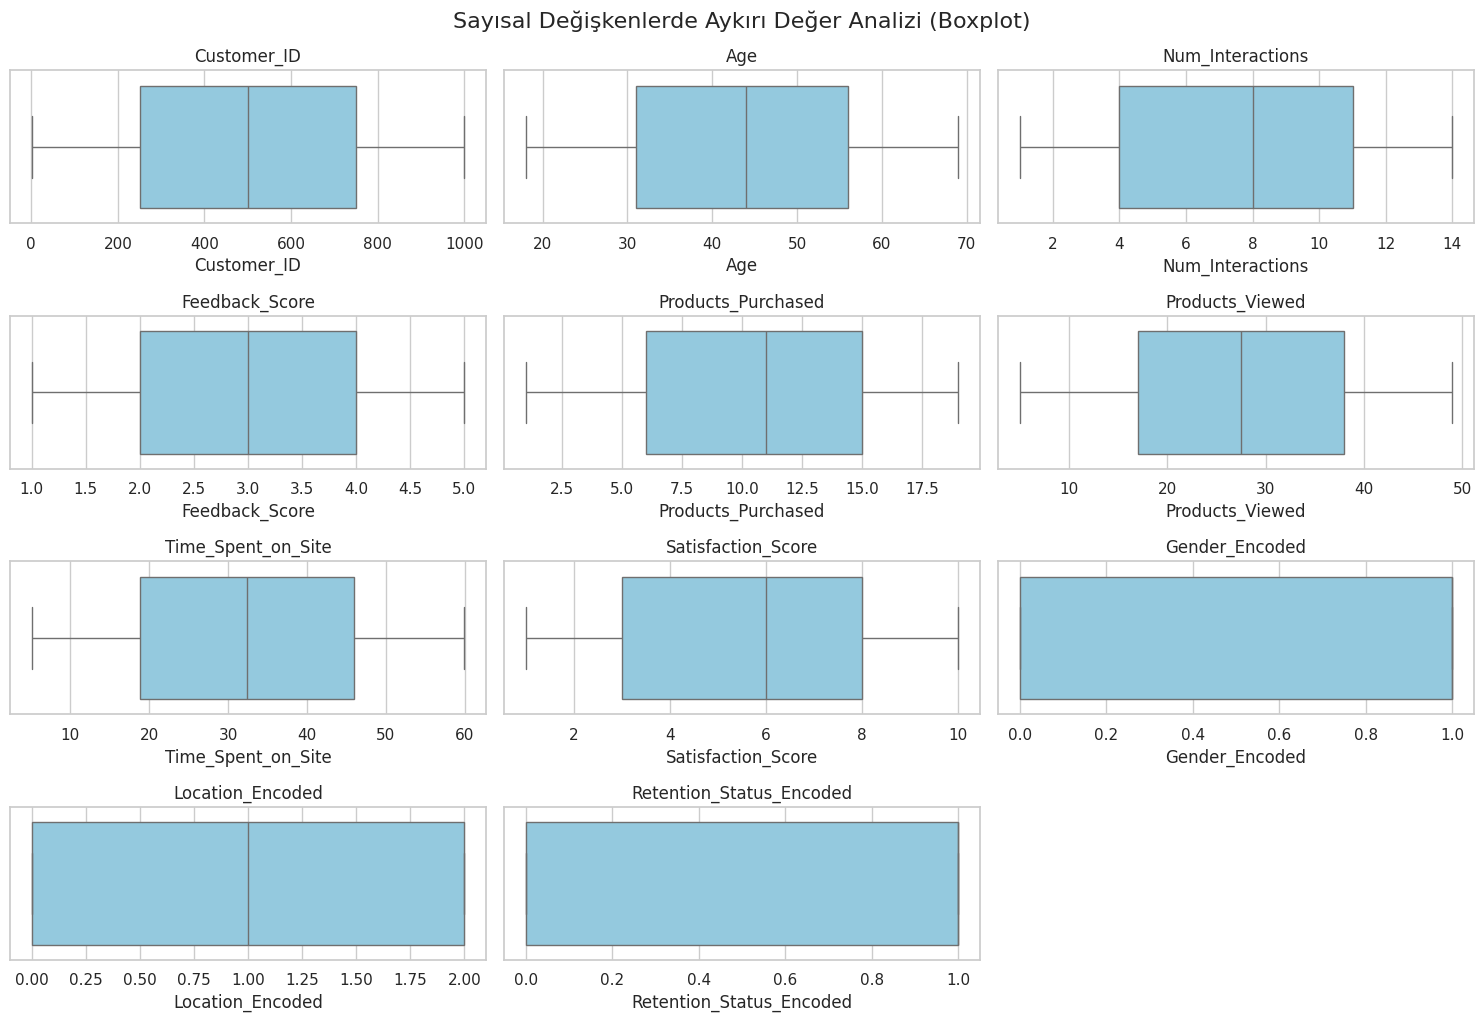

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grafik boyutu
plt.figure(figsize=(15, 10))

# SayÄ±sal deÄŸiÅŸkenleri dÃ¶ngÃ¼yle Ã§iz
for i, col in enumerate(num_cols):
    plt.subplot(4, 3, i+1)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(col)
    plt.tight_layout()

plt.suptitle("SayÄ±sal DeÄŸiÅŸkenlerde AykÄ±rÄ± DeÄŸer Analizi (Boxplot)", y=1.02, fontsize=16)
plt.show()

## 4.3. AykÄ±rÄ± DeÄŸerlerin GÃ¶rsel Ä°ncelemesi

AÅŸaÄŸÄ±daki boxplot grafikleri, veri setindeki sayÄ±sal deÄŸiÅŸkenlerin daÄŸÄ±lÄ±mÄ±nÄ± ve olasÄ± aykÄ±rÄ± deÄŸerleri gÃ¶stermektedir.

Her bir grafik, deÄŸiÅŸkenin medyanÄ±nÄ±, Ã§eyrek deÄŸerlerini ve uÃ§ deÄŸerlerini aÃ§Ä±kÃ§a gÃ¶rselleÅŸtirir.

### ðŸ“Œ Yorum:
- TÃ¼m sayÄ±sal deÄŸiÅŸkenlerde veri daÄŸÄ±lÄ±mÄ± oldukÃ§a dengelidir.
- **HiÃ§bir deÄŸiÅŸkende aykÄ±rÄ± (uÃ§) gÃ¶zlem noktasÄ± bulunmamaktadÄ±r.**
- Bu durum, verinin istatistiksel olarak temiz olduÄŸunu ve modelleme aÅŸamasÄ±nda uÃ§ deÄŸer kaynaklÄ± bozulmalar yaÅŸanmayacaÄŸÄ±nÄ± gÃ¶sterir.

## 5. Veri GÃ¶rselleÅŸtirme

Bu bÃ¶lÃ¼mde, veri setindeki sayÄ±sal ve kategorik deÄŸiÅŸkenlerin daÄŸÄ±lÄ±mÄ± gÃ¶rselleÅŸtirilmiÅŸtir.

- **SayÄ±sal deÄŸiÅŸkenler** iÃ§in histogram ve yoÄŸunluk eÄŸrileri (KDE) kullanÄ±lmÄ±ÅŸtÄ±r.
- **Kategorik deÄŸiÅŸkenler** iÃ§in frekans grafikleri (countplot) kullanÄ±lmÄ±ÅŸtÄ±r.

Bu gÃ¶rseller, verinin genel yapÄ±sÄ±nÄ± anlamamÄ±za, uÃ§ deÄŸerleri fark etmemize ve deÄŸiÅŸkenlerin daÄŸÄ±lÄ±mÄ± hakkÄ±nda fikir edinmemize yardÄ±mcÄ± olur.

### 5.1. SayÄ±sal DeÄŸiÅŸkenlerin DaÄŸÄ±lÄ±mÄ±

AÅŸaÄŸÄ±daki histogramlar ve KDE eÄŸrileri, veri setindeki sayÄ±sal deÄŸiÅŸkenlerin daÄŸÄ±lÄ±mÄ±nÄ± gÃ¶stermektedir:

- Ã‡oÄŸu deÄŸiÅŸken normal daÄŸÄ±lÄ±ma yakÄ±n simetrik bir yapÄ±ya sahiptir.
- `Feedback_Score`, `Gender_Encoded`, `Location_Encoded` gibi bazÄ± deÄŸiÅŸkenler kategorik Ã¶zellik taÅŸÄ±dÄ±ÄŸÄ±ndan dolayÄ± kesikli (discrete) yapÄ±lar gÃ¶stermektedir.
- `Time_Spent_on_Site`, `Products_Purchased` gibi deÄŸiÅŸkenlerde daÄŸÄ±lÄ±m dengeli gÃ¶rÃ¼nmektedir.

Bu grafikler, modelleme Ã¶ncesi verinin genel yapÄ±sÄ±nÄ± ve daÄŸÄ±lÄ±m ÅŸeklini anlamamÄ±za yardÄ±mcÄ± olur.

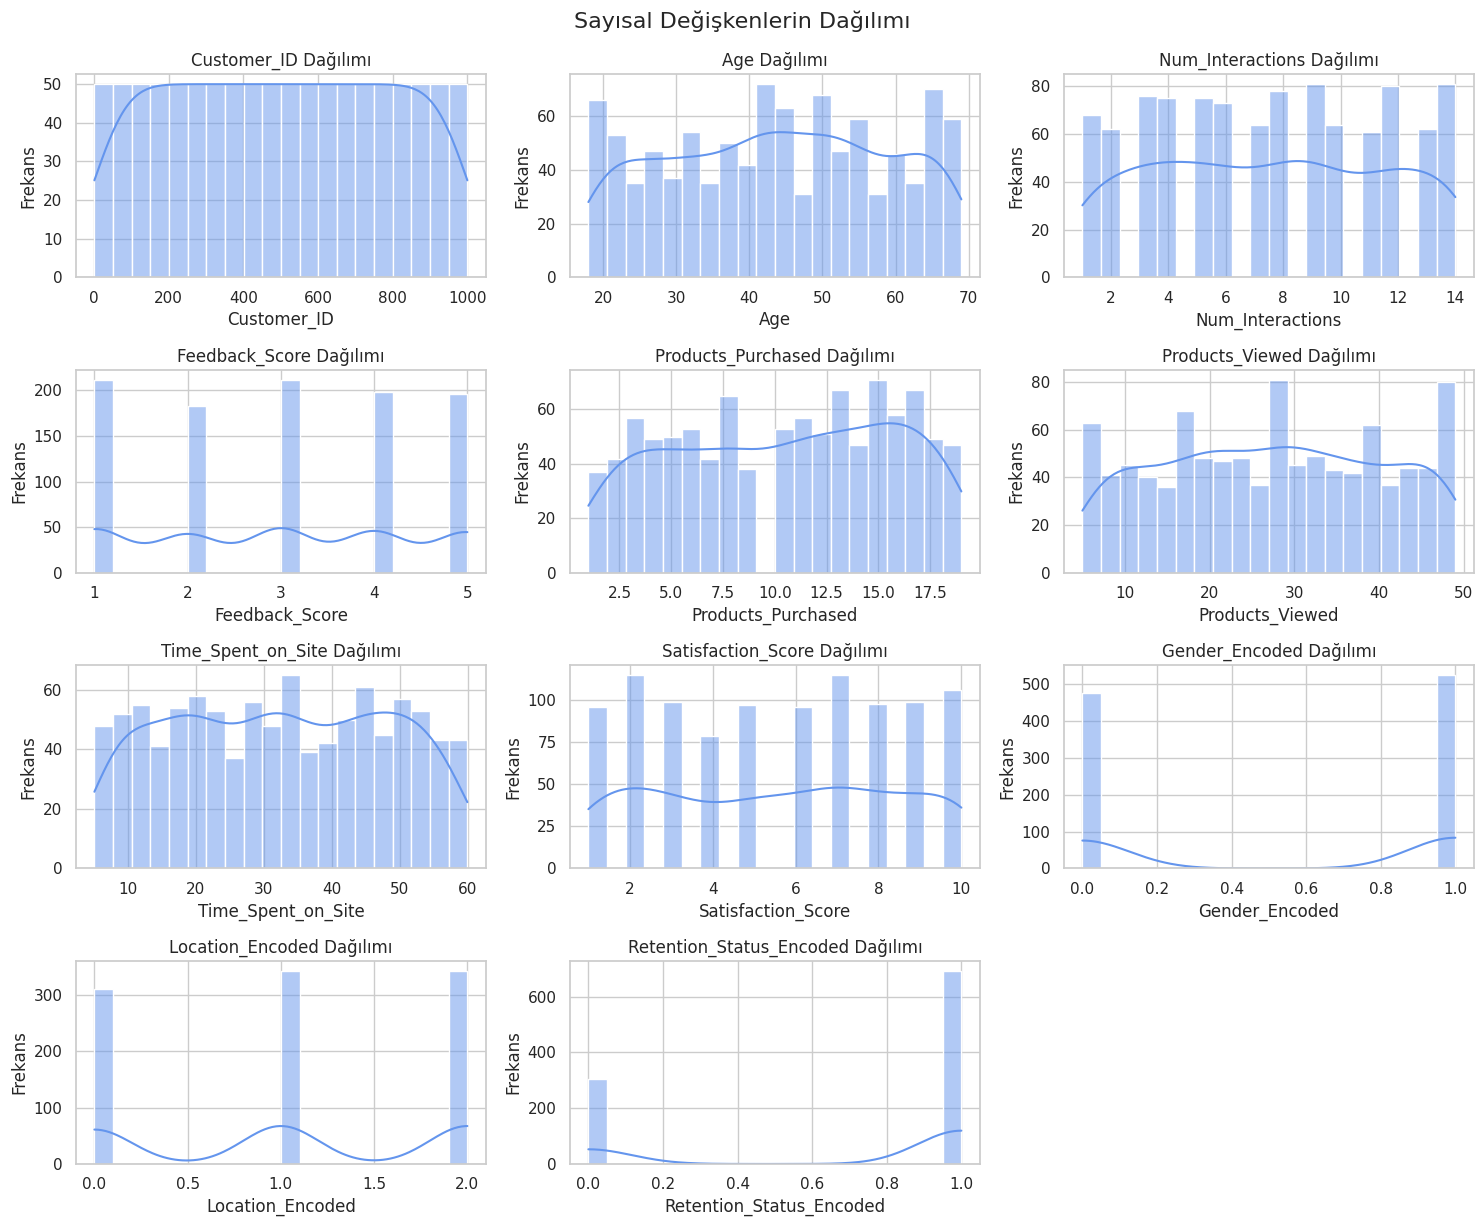

In [ ]:
# Histogram + KDE (Kernel Density Estimation)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 12))
for i, col in enumerate(num_cols):
    plt.subplot(4, 3, i+1)
    sns.histplot(df[col], kde=True, bins=20, color='cornflowerblue')
    plt.title(f"{col} DaÄŸÄ±lÄ±mÄ±")
    plt.xlabel(col)
    plt.ylabel("Frekans")
    plt.tight_layout()

plt.suptitle("SayÄ±sal DeÄŸiÅŸkenlerin DaÄŸÄ±lÄ±mÄ±", y=1.02, fontsize=16)
plt.show()

### 5.2. Kategorik DeÄŸiÅŸkenlerin DaÄŸÄ±lÄ±mÄ±

Kategorik deÄŸiÅŸkenler iÃ§in sÃ¼tun grafikleri kullanÄ±larak frekans daÄŸÄ±lÄ±mlarÄ± gÃ¶rselleÅŸtirilmiÅŸtir:

- `Gender`: Erkek ve kadÄ±n daÄŸÄ±lÄ±mÄ± dengelidir (yaklaÅŸÄ±k yarÄ± yarÄ±ya).
- `Location`: KullanÄ±cÄ±lar Urban, Suburban ve Rural bÃ¶lgeler arasÄ±nda eÅŸit daÄŸÄ±lmÄ±ÅŸtÄ±r.
- `Retention_Status`: Retained (sitede kalan) kullanÄ±cÄ± sayÄ±sÄ±, Churned (kaybedilen) kullanÄ±cÄ± sayÄ±sÄ±ndan belirgin ÅŸekilde fazladÄ±r.

Bu grafikler, veri setindeki kategorik dengesizliklerin fark edilmesine ve olasÄ± veri Ã¶n iÅŸleme ihtiyaÃ§larÄ±nÄ±n tespit edilmesine katkÄ± saÄŸlar.

In [ ]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
cat_cols

['Gender', 'Location', 'Retention_Status']

/tmp/ipython-input-28-4113694770.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')
/tmp/ipython-input-28-4113694770.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')
/tmp/ipython-input-28-4113694770.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


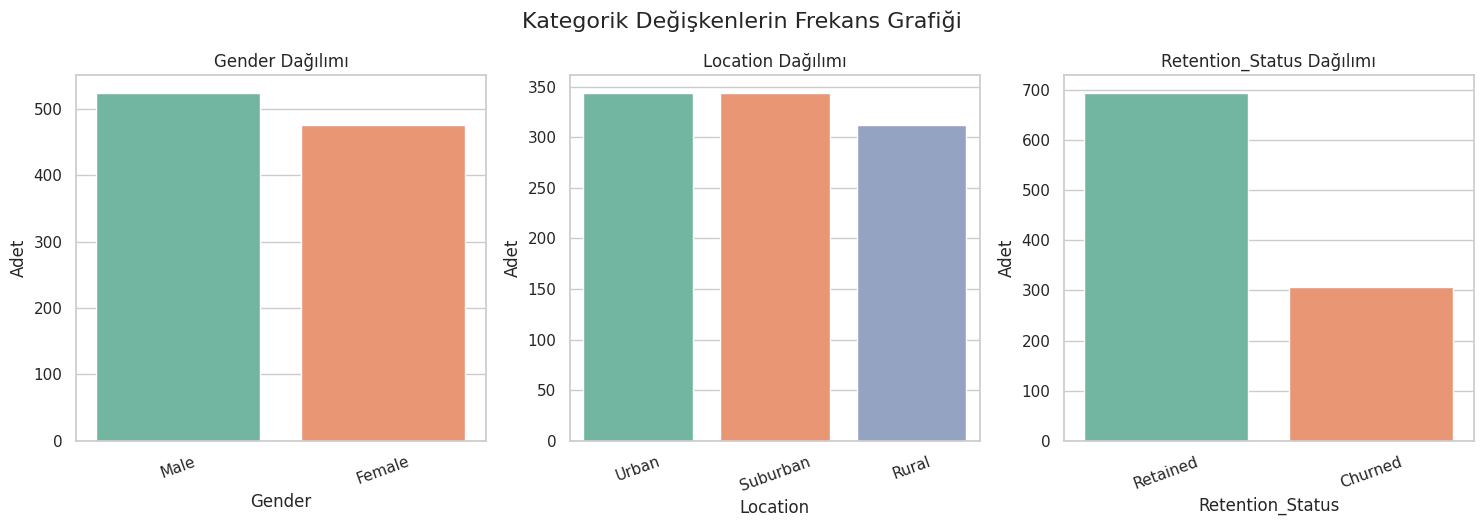

In [ ]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(cat_cols):
    plt.subplot(1, 3, i+1)
    sns.countplot(data=df, x=col, palette='Set2')
    plt.title(f"{col} DaÄŸÄ±lÄ±mÄ±")
    plt.ylabel("Adet")
    plt.xticks(rotation=20)
    plt.tight_layout()

plt.suptitle("Kategorik DeÄŸiÅŸkenlerin Frekans GrafiÄŸi", y=1.05, fontsize=16)
plt.show()

## 6. SonuÃ§ ve DeÄŸerlendirme

Proje kapsamÄ±nda, mÃ¼ÅŸteri deneyimini Ã¶lÃ§en bir veri seti Ã¼zerinde temel veri analizi adÄ±mlarÄ± gerÃ§ekleÅŸtirilmiÅŸtir. Elde edilen bulgular aÅŸaÄŸÄ±da Ã¶zetlenmiÅŸtir:

- **Ä°statistiksel Ã–zet:** SayÄ±sal deÄŸiÅŸkenler iÃ§in ortalama, medyan, standart sapma gibi temel istatistikler hesaplanarak verinin merkezi eÄŸilimleri ve daÄŸÄ±lÄ±mlarÄ± incelenmiÅŸtir.
- **Eksik DeÄŸer Analizi:** Veri setinde eksik deÄŸer bulunmamaktadÄ±r, bu nedenle herhangi bir doldurma veya veri silme iÅŸlemi uygulanmamÄ±ÅŸtÄ±r.
- **AykÄ±rÄ± DeÄŸer Analizi:** Boxplot ve IQR yÃ¶ntemine dayalÄ± analizler sonucunda aykÄ±rÄ± deÄŸer gÃ¶zlemlenmemiÅŸtir. Bu da verinin temiz ve analiz iÃ§in uygun olduÄŸunu gÃ¶stermektedir.
- **GÃ¶rselleÅŸtirme:** SayÄ±sal deÄŸiÅŸkenler iÃ§in histogram ve KDE eÄŸrileri, kategorik deÄŸiÅŸkenler iÃ§in sÃ¼tun grafikler kullanÄ±lmÄ±ÅŸtÄ±r. Bu sayede kullanÄ±cÄ± davranÄ±ÅŸlarÄ±, Ã¼rÃ¼n etkileÅŸimleri ve memnuniyet dÃ¼zeyleri hakkÄ±nda gÃ¶rsel iÃ§gÃ¶rÃ¼ler elde edilmiÅŸtir.

